# Tutorial 5: How to Use Geometries in PINA

In this tutorial we will show how to use geometries in PINA. Specifically, the tutorial will include how to create geometries and how to visualize them. The topics covered are:

* Creating CartesianDomains and EllipsoidDomains
* Getting the Union and Difference of Geometries
* Sampling points in the domain
* Visualizing geometries (using matplotlib)

### Importing the Relevant Modules

In [54]:
# import torch
import matplotlib.pyplot as plt
from pina.geometry import EllipsoidDomain, Difference, CartesianDomain, Union
from pina.label_tensor import LabelTensor

### Creating CartesianDomains and EllipsoidDomains

We will create one cartesian and two ellipsoids. We will do this in 2D to begin. The `EllipsoidDomain` allows us to only take the border if we chose to. So, we will create one ellipsoid with the border and one without.

In [55]:
cartesian = CartesianDomain({'x': [0, 2], 'y': [0, 2]})
ellipsoid_no_border = EllipsoidDomain({'x': [1, 3], 'y': [1, 3]})
ellipsoid_border = EllipsoidDomain({'x': [2, 4], 'y': [2, 4]}, sample_surface=True)

The `{'x': [0, 2], 'y': [0, 2]}` are the bounds of the `CartesianDomain` being created. 

### Sampling Points in the Domain

To visualize these figures, we need to sample points on them. We will use the `sample` method of the `CartesianDomain` and `EllipsoidDomain` classes. This method takes a `n` argument which is the number of points to sample. It also takes different modes to sample such as random.

In [56]:
cartesian_samples = cartesian.sample(n=1000, mode='random')
ellipsoid_no_border_samples = ellipsoid_no_border.sample(n=1000, mode='random')
ellipsoid_border_samples = ellipsoid_border.sample(n=1000, mode='random')

We can see the samples of each of the geometries to see what we are working with.

In [57]:
print(f"Casrtesian Samples: {cartesian_samples}")
print(f"Ellipsoid No Border Samples: {ellipsoid_no_border_samples}")
print(f"Ellipsoid Border Samples: {ellipsoid_border_samples}")

Casrtesian Samples: labels(['x', 'y'])
LabelTensor([[0.1348, 1.1301],
             [0.2954, 0.6250],
             [0.4387, 0.1528],
             ...,
             [1.4975, 0.8130],
             [0.5888, 1.9883],
             [0.8344, 1.1917]])
Ellipsoid No Border Samples: labels(['x', 'y'])
LabelTensor([[2.3616, 2.5088],
             [1.8048, 1.9664],
             [2.3184, 2.2500],
             ...,
             [2.0812, 1.5128],
             [1.7821, 2.5880],
             [2.1772, 1.9312]])
Ellipsoid Border Samples: labels(['x', 'y'])
LabelTensor([[2.0719, 2.6275],
             [4.0000, 2.9979],
             [3.9442, 3.3294],
             ...,
             [2.0115, 3.1509],
             [3.3323, 2.0568],
             [3.9198, 2.6077]])


Notice how these are all LabelTensors. You can read more about these in the [documentation](https://mathlab.github.io/PINA/_rst/label_tensor.html). At a very high level, they are tensors where each element in a tensor has a label that we can access doing `<tensor_name>.labels`. We can also access the values of the tensor doing `<tensor_name>.extract('x')`.

### Visualizing Geometries

We are now ready to visualize the samples using matplotlib.

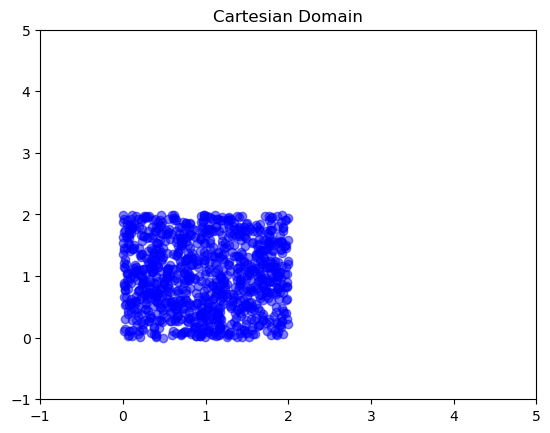

In [58]:
fig, ax = plt.subplots()
ax.set_xlim([-1, 5]) #set x axis limits
ax.set_ylim([-1, 5]) #set y axis limits
ax.title.set_text('Cartesian Domain')
ax.scatter(cartesian_samples.extract('x'), cartesian_samples.extract('y'), color='blue', alpha=0.5)


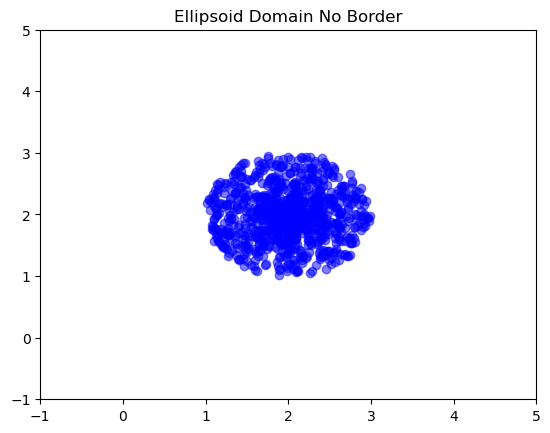

In [59]:
fig, ax = plt.subplots()
ax.set_xlim([-1, 5]) #set x axis limits
ax.set_ylim([-1, 5]) #set y axis limits
ax.title.set_text('Ellipsoid Domain No Border')
ax.scatter(ellipsoid_no_border_samples.extract('x'), ellipsoid_no_border_samples.extract('y'), color='blue', alpha=0.5)

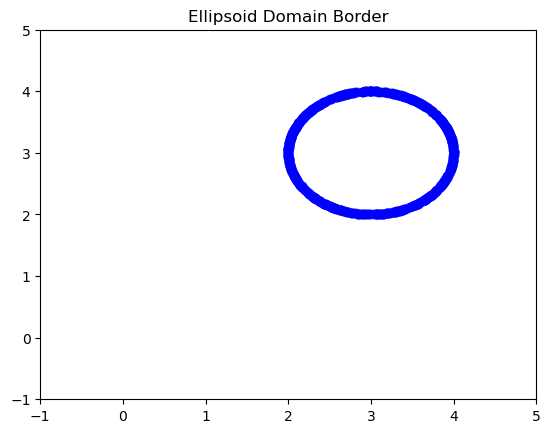

In [60]:
fig, ax = plt.subplots()
ax.set_xlim([-1, 5]) #set x axis limits
ax.set_ylim([-1, 5]) #set y axis limits
ax.title.set_text('Ellipsoid Domain Border')
ax.scatter(ellipsoid_border_samples.extract('x'), ellipsoid_border_samples.extract('y'), color='blue', alpha=0.5)

We have now created, sampled, and visualized our first geometries! We can see that the `EllipsoidDomain` with the border has a border around it. We can also see that the `EllipsoidDomain` without the border is just the ellipse. We can also see that the `CartesianDomain` is just a square.

### Getting the Union of Geometries

To get the geometries of the geometries we have defined previously, we need to simply use the `union` method of the `Geometry` class. This method takes a list of geometries and returns the union of them.

Let's create three unions. Firstly, it will be a union of `cartesian` and `ellipsoid_no_border`. Next, it will be a union of `ellipse_no_border` and `ellipse_border`. Lastly, it will be a union of all three geometries.

In [61]:
cart_ellipse_nb_union = Union([cartesian, ellipsoid_no_border])
cart_ellipse_b_union = Union([cartesian, ellipsoid_border])
three_domain_union = Union([cartesian, ellipsoid_no_border, ellipsoid_border])

### Sampling from a Union

This is the same process as sampling from a single geometry as shown below.

In [62]:
c_e_nb_u_points = cart_ellipse_nb_union.sample(n=2000, mode='random')
c_e_b_u_points = cart_ellipse_b_union.sample(n=2000, mode='random')
three_domain_union_points = three_domain_union.sample(n=3000, mode='random')

We can see the samples of each of the unions to see what we are working with.

In [63]:
print(f"Cartesian with Ellipsoid No Border Union Samples: {c_e_nb_u_points}")
print(f"Cartesian with Ellipsoid Border Union Samples: {c_e_b_u_points}")
print(f"Three Domain Union Samples: {three_domain_union_points}")

Cartesian with Ellipsoid No Border Union Samples: labels(['x', 'y'])
LabelTensor([[2.0529, 2.0220],
             [2.1225, 2.0755],
             [1.5454, 1.6313],
             ...,
             [0.1112, 0.3892],
             [1.0922, 1.0978],
             [0.8399, 1.2984]])
Cartesian with Ellipsoid Border Union Samples: labels(['x', 'y'])
LabelTensor([[3.8786, 2.5224],
             [3.8916, 2.5471],
             [2.8703, 2.0084],
             ...,
             [1.2984, 0.3297],
             [0.6213, 1.6151],
             [0.5055, 0.9019]])
Three Domain Union Samples: labels(['x', 'y'])
LabelTensor([[2.3646, 2.2278],
             [3.9122, 2.5904],
             [2.9175, 3.9966],
             ...,
             [1.8695, 1.9908],
             [2.0067, 1.7305],
             [2.2270, 2.0475]])


### Visualizing the Unions

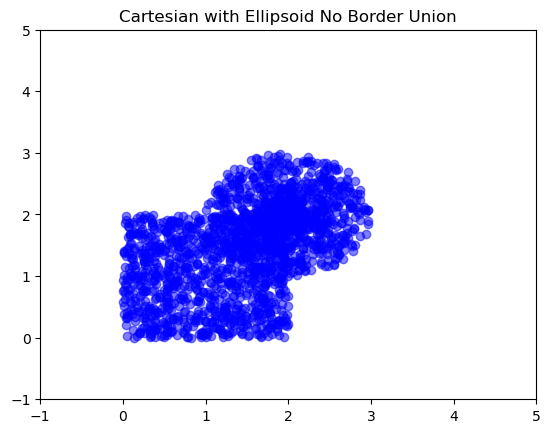

In [64]:
fig, ax = plt.subplots()
ax.set_xlim([-1, 5]) #set x axis limits
ax.set_ylim([-1, 5]) #set y axis limits
ax.title.set_text('Cartesian with Ellipsoid No Border Union')
ax.scatter(c_e_nb_u_points.extract('x'), c_e_nb_u_points.extract('y'), color='blue', alpha=0.5)

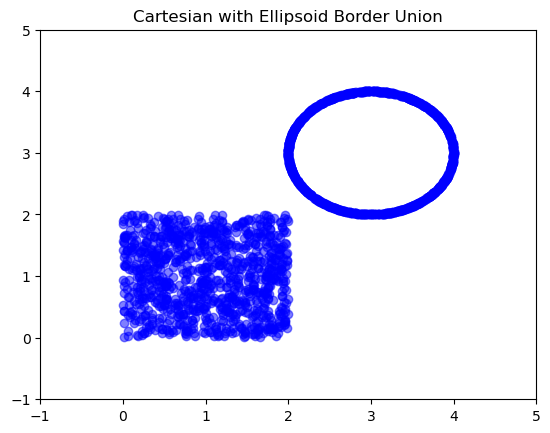

In [65]:
fig, ax = plt.subplots()
ax.set_xlim([-1, 5]) #set x axis limits
ax.set_ylim([-1, 5]) #set y axis limits
ax.title.set_text('Cartesian with Ellipsoid Border Union')
ax.scatter(c_e_b_u_points.extract('x'), c_e_b_u_points.extract('y'), color='blue', alpha=0.5)

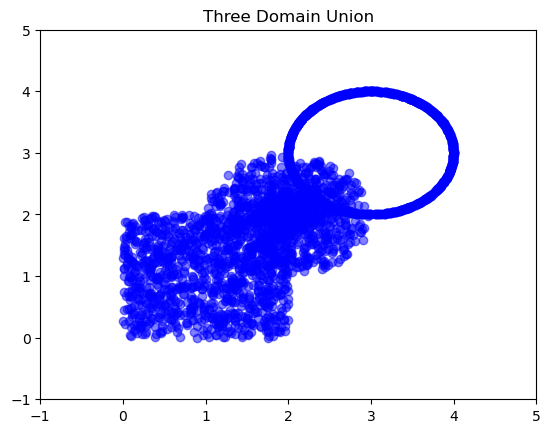

In [66]:
fig, ax = plt.subplots()
ax.set_xlim([-1, 5]) #set x axis limits
ax.set_ylim([-1, 5]) #set y axis limits
ax.title.set_text('Three Domain Union')
ax.scatter(three_domain_union_points.extract('x'), three_domain_union_points.extract('y'), color='blue', alpha=0.5)

### Getting the Difference of Geometries

#### Union of Two Ellipsoids with only Borders

Now, we will find the differences of the geometries. We will find the difference of `ellipsoid_no_border` and `ellipsoid_border`, the difference of `ellipsoid_border` and `cartesian`, and the difference of all threee geometries.

In [67]:
"""STILL NEED TO WRITE THIS CODE. WILL DO ONCE DIFFERENCE CLASS GET'S IMPLEMENTED"""

"STILL NEED TO WRITE THIS CODE. WILL DO ONCE DIFFERENCE CLASS GET'S IMPLEMENTED"

One specific use case would to be create a union of ellipsoids with just there border. To do this, we need to make use of both the Difference and Union classes we have covered. We will create a union of two ellipsoids and then subtract the filled ellipsoids from the union.

Union Borders Samples: labels(['x', 'y'])
LabelTensor([[2.4074, 2.1945],
             [3.9951, 3.0985],
             [2.0856, 3.4047],
             ...,
             [2.6625, 2.7490],
             [2.6946, 2.7194],
             [2.6803, 2.7329]])


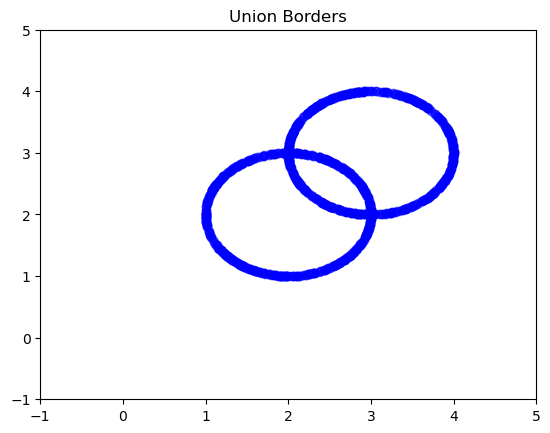

In [68]:
"""
THIS CODE IS NOT COMPLETE. STILL NEED TO IMPLEMENT DIFFERENCE, INTERSECTION, OR SUBTRACTION
ONCE THAT IS DONE, WE CAN FINISH THIS PART OF THE TUTORIAL.
"""

ellipsiod1 = EllipsoidDomain({'x': [1, 3], 'y': [1, 3]}, sample_surface=True)
ellipsiod2 = EllipsoidDomain({'x': [2, 4], 'y': [2, 4]}, sample_surface=True)

union_borders = Union([ellipsiod1, ellipsiod2])

union_borders_points = union_borders.sample(n=1000, mode='random')

print(f"Union Borders Samples: {union_borders_points}")

fig, ax = plt.subplots()
ax.set_xlim([-1, 5]) #set x axis limits
ax.set_ylim([-1, 5]) #set y axis limits
ax.title.set_text('Union Borders')
ax.scatter(union_borders_points.extract('x'), union_borders_points.extract('y'), color='blue', alpha=0.5)